# Download Dataset

Download (10GB) the Military Aircraft Detection Dataset from Kaggle, unzip just the dataset into raw

Total RAW data = 8GB

**IMPORTANT**: Api key (json) from Kaggle needs to be added to the notebooks folder of the project in order to download the dataset

In [2]:
# Download tool and add api keys
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/marcgaspajoval/.kaggle: File exists


In [3]:
TRUE_CONDITIONS = ['y', 'yes']


# Download the dataset
delete_temp = input('\tYes(Y)/No(N): ')

if delete_temp.lower() in TRUE_CONDITIONS:
    ! mkdir ./temp
    ! kaggle datasets download -d a2015003713/militaryaircraftdetectiondataset -p ./temp
    # Unzip the dataset
    ! unzip - j ./temp/militaryaircraftdetectiondataset.zip "dataset/*" - d ../data/raw
    # Remove temporal files?
    ! rm - rf ./temp


# First Study

In [4]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the CSV's and Images

In [5]:
csv_path = "../data/raw/"
df = pd.concat([pd.read_csv(csv_path + f, delimiter=',') for f in os.listdir(csv_path) if f.endswith('.csv')], ignore_index=True)
df.to_csv('../data/interim/merged_info.csv', index=False)

In [6]:
print("Rows and columns of the DataFrame" , df.shape)

Rows and columns of the DataFrame (17906, 8)


In [7]:
if df.isnull().values.any():
    print("There are null values in DF")
else:
    print("No null values in DF.")

No null values in DF.


In [8]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,5dc92840a1c2570658f210118ee712af,4096,2730,F15,253,1070,2275,1627
1,5dc92840a1c2570658f210118ee712af,4096,2730,F15,1680,908,4057,1656
2,ce0ef7f5181357f27e09a98f4f07aa26,1600,1075,SR71,216,345,1195,586
3,769c27a7b2c804a73458175fd13a3a53,916,316,J20,303,183,684,282
4,f8dcbb25ac0f69b2a7b4408e9481cedc,1041,1314,F18,252,16,750,1312


<Axes: ylabel='class'>

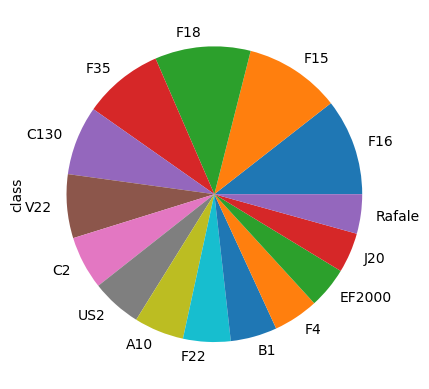

In [9]:
df["class"].value_counts().head(15).plot(kind="pie") #See where can we reduce a bit our dataset



# Reducing Data
Because the problem is too big, we will keep the best X classes in order to making the modeling process shorter and less computing intensive

Reduced from 17906 rows to 3159 rows


<Axes: ylabel='class'>

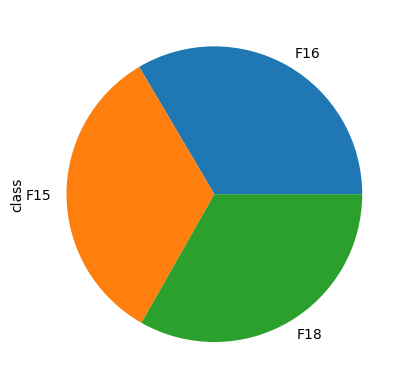

In [10]:
target = ["F16", "F15", "F18"]

df_reduced = df.loc[df["class"].isin(target)].copy(deep=True)

print(f"Reduced from {len(df.index)} rows to {len(df_reduced.index)} rows")
df_reduced["class"].value_counts().plot(kind="pie")

# Using YOLO
We will download the YOLOv5 repo in order to change the classes in its model to ours so it can classify them


## Downloading repo and installing dependencies


In [13]:
!pwd
!cd ../references
!pwd

/Users/marcgaspajoval/Documents/sky-defender/references/yolov5
zsh:cd:1: no such file or directory: ../references
/Users/marcgaspajoval/Documents/sky-defender/references/yolov5


In [12]:
import utils
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

/Users/marcgaspajoval/Documents/sky-defender/notebooks
/Users/marcgaspajoval/Documents/sky-defender/references
/Users/marcgaspajoval/Documents/sky-defender/references
S'està clonant a «yolov5»...
remote: Enumerating objects: 15831, done.
remote: Total 15831 (delta 0), reused 0 (delta 0), pack-reused 15831
S'estan rebent objectes: 100% (15831/15831), 14.42 MiB | 12.18 MiB/s, fet.
S'estan resolent les diferències: 100% (10874/10874), fet.
/Users/marcgaspajoval/Documents/sky-defender/references/yolov5
Note: you may need to restart the kernel to use updated packages.
